In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
from config import *
import seaborn as sns
import numpy as np
%matplotlib inline

install_import_path = os.path.join(tmp_dir, "files", "install_import.json")
install_import_path = r"T:\project\ReqBench\files\install_import.json"

In [7]:
install_import_dict = json.load(open(install_import_path))
formatted_data = []
for pkg_name, versions in install_import_dict.items():
    for version, details in versions.items():
        formatted_data.append({
            "package": pkg_name,
            "version": version,
            **details
        })

df = pd.DataFrame(formatted_data)

In [8]:
matplotlib.rcParams["font.size"] = 20

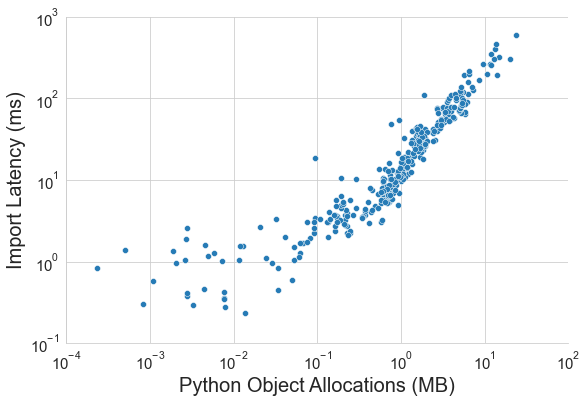

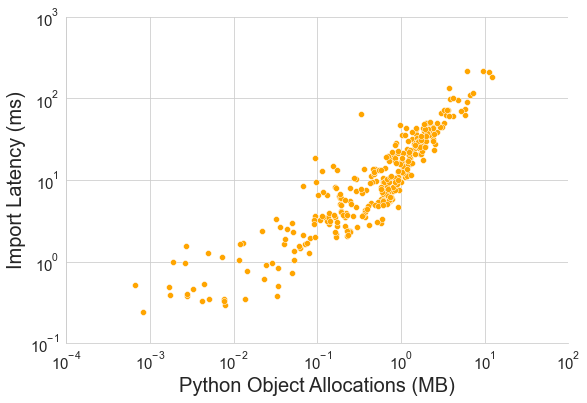

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

legend_fontsize = 15
ticks_fontsize = 15

def plot_time_mem(df, include_indirect=True, filename="plot.pdf"):
    plt.figure(figsize=(9, 6))
    if include_indirect:
        scatter_color = (38 / 255, 123 / 255, 182 / 255)
        x, y = "i-mb", "i-ms"
    else:
        scatter_color = "orange"
        x, y = "mb", "ms"
    
    ax = sns.scatterplot(data=df, x=x, y=y, color=scatter_color)
    ax.set(xscale="log", yscale="log")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(left=0.0001, right=100)
    ax.set_ylim(bottom=0.1, top=1000)
    ax.set_xlabel("Python Object Allocations (MB)")
    ax.set_ylabel("Import Latency (ms)")
    
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)
    if filename:
        plt.savefig(filename, format='pdf', bbox_inches='tight')

    plt.show()

    
plot_time_mem(df, include_indirect=True, filename="files/time_mem_scatter.pdf")

plot_time_mem(df, include_indirect=False) 

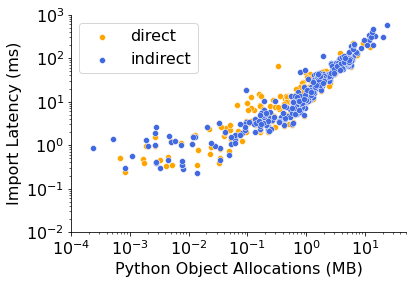

In [51]:
def plot_combined_time_mem(df):
    colors = {"direct": "orange", "indirect": "royalblue"}
    columns = {"direct": ("mb", "ms"), "indirect": ("i-mb", "i-ms")}

    ax = plt.gca() 
    ax.set(xscale="log", yscale="log")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    for key, color in colors.items():
        x, y = columns[key]
        sns.scatterplot(data=df, x=x, y=y, color=color, label=key, ax=ax)

    ax.set_xlim(left=0.0001, right=50)
    ax.set_ylim(bottom=0.01, top=1000)
    ax.set_xlabel("Python Object Allocations (MB)")
    ax.set_ylabel("Import Latency (ms)")
    plt.legend()
    plt.show()

plot_combined_time_mem(df)


In [14]:
num = 9.3
percentage = (df[df["i-ms"] > num]["i-ms"].count() / df["i-ms"].count()) * 100
print(percentage)   

44.2
